In [21]:
import matplotlib.pylab as plt
import numpy as np
import Elasticity1D_FEM as fem1d
from scipy.integrate import quad

In [16]:
#====================================
# Theoretical solution
#====================================

n1=1000

u = np.zeros(n1)

x=np.linspace(0,1,n1)

for i in np.arange(n1):
    u[i] = (3*np.sqrt(3)*x[i]/2 - 3*np.sqrt(3)*x[i]**3/2)
    

du = np.zeros(n1)

for i in np.arange(n1):
    du[i] = (3*np.sqrt(3)/2 - 9*np.sqrt(3)*x[i]**2/2)

In [17]:
def ue(x):
    ue= (3*np.sqrt(3)*x/2 - 3*np.sqrt(3)*x**3/2)
    return ue

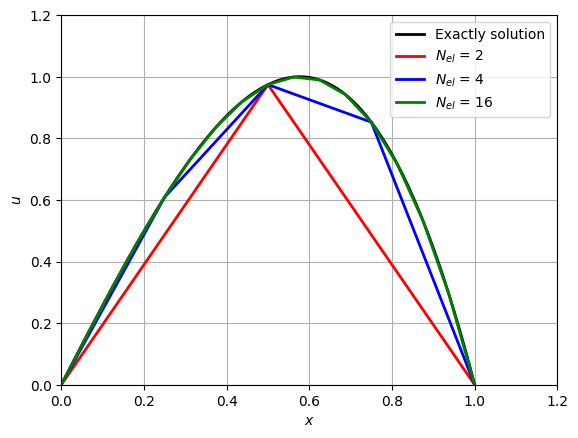

In [25]:
#====================================
# Plots
#====================================

# Number of elements, Ne = 2, 4, 16.
#====================================
Nel=[2,4,16]
color = ['r','b','g']
plt.figure()
plt.plot(x,u,'k',lw=2,label='Exactly solution')
for Ne in Nel:
    n=1000
    L=1.
    xloc=np.linspace(0,L,n)

    xh=fem1d.Elasticity1D_FEM(Ne,1)[1]
    uh=fem1d.Elasticity1D_FEM(Ne,1)[0]
            
    plt.grid('on')
    plt.ylim(0,1.2)
    plt.xlim(0,1.2)
    plt.ylabel('$u$')
    plt.xlabel('$x$')
    if Ne == 2:
        color = 'r'
    elif Ne == 4:
        color = 'b'
    else:
        color = 'g'
    plt.plot(xh,uh,color,lw=2,label='$N_{el}$ = '+str(Ne))
    plt.legend(loc='upper right')
plt.show()

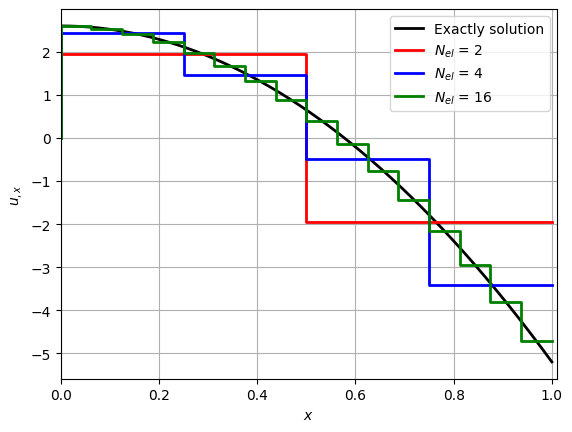

In [20]:
plt.figure()
plt.plot(x,du,'k',lw=2,label='Exactly solution')
for Ne in Nel:    

    n=1000
    L=1.
    xloc=np.linspace(0,L,n)

    xh=Elasticity1D_FEM(Ne,1)[1]
    uh=Elasticity1D_FEM(Ne,1)[0]

    duh = np.zeros(Ne)
    a = np.zeros([Ne*2 + 1,2])

    for i in np.arange(Ne):
        m = ((uh[i+1]-uh[i])
        /(xh[i+1]-xh[i]))
        duh[i] = m       

    f1 = 0
    f2 = 0
    for f in np.arange(Ne*2 + 1):
        for c in np.arange(2):
            if f==0:
                a[0,0] = xh[0]
                a[0,1] = 0
                break               
            elif c == 0:
                a[f,c] = xh[f1]
            else:
                a[f,c] = duh[f2]
        
        if f > f1*2:
            f1 += 1
        if f > f2*2 +1:
            f2 += 1                

    if Ne == 2:
        color = 'r'
    elif Ne == 4:
        color = 'b'
    else:
        color = 'g'
        
    plt.grid('on')
    plt.xlim(0,1.01)
    plt.ylabel('$u_{,x}$')
    plt.xlabel('$x$')
    plt.plot(a[:,0],a[:,1],color,lw=2,label
    ='$N_{el}$ = '+str(Ne))
    plt.legend(loc='upper right')
plt.show()